# Milestone 3

## Predictive Model Development and Optimization

### 1. Model Selection:

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("preprocessed_stroke_data.csv")

In [8]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,False,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,True,False,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,True,False
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,True,False,False


In [10]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'smoking_status_unknown'],
      dtype='object')

In [12]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2. Model Training:

In [17]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f}")
    model.fit(X_train, y_train)

Logistic Regression CV Accuracy: 0.9543
Random Forest CV Accuracy: 0.9535
Gradient Boosting CV Accuracy: 0.9516
Neural Network CV Accuracy: 0.9445


### 3. Model Evaluation: 

#### Logistic Regression

In [22]:
lr_model = models["Logistic Regression"]
lr_preds = lr_model.predict(X_test)

print("Logistic Regression")
print("Accuracy :",accuracy_score(y_test, lr_preds))
print("Precision:", precision_score(y_test, lr_preds))
print("Recall   :", recall_score(y_test, lr_preds))
print("F1 Score :", f1_score(y_test, lr_preds))
print("ROC AUC  :", roc_auc_score(y_test, lr_preds))

Logistic Regression
Accuracy : 0.9393346379647749
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC AUC  : 0.5


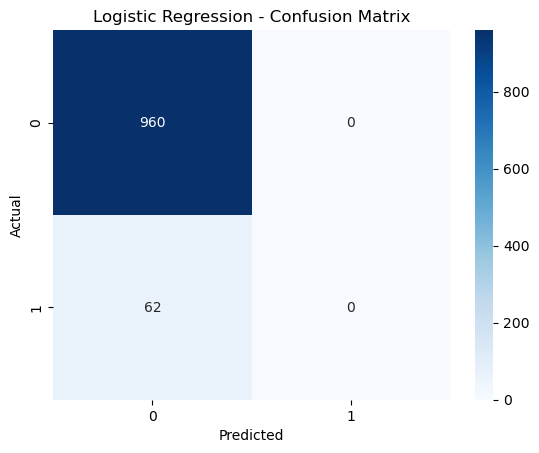

In [23]:
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

In [25]:
rf_model = models["Random Forest"]
rf_preds = rf_model.predict(X_test)

print("Random Forest")
print("Accuracy :", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall   :", recall_score(y_test, rf_preds))
print("F1 Score :", f1_score(y_test, rf_preds))
print("ROC AUC  :", roc_auc_score(y_test, rf_preds))

Random Forest
Accuracy : 0.9393346379647749
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
ROC AUC  : 0.5


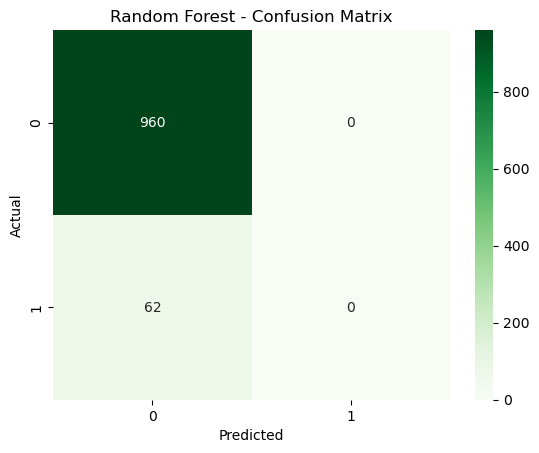

In [26]:
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Gradient Boosting

In [28]:
gb_model = models["Gradient Boosting"]
gb_preds = gb_model.predict(X_test)

print("Gradient Boosting")
print("Accuracy :", accuracy_score(y_test, gb_preds))
print("Precision:", precision_score(y_test, gb_preds))
print("Recall   :", recall_score(y_test, gb_preds))
print("F1 Score :", f1_score(y_test, gb_preds))
print("ROC AUC  :", roc_auc_score(y_test, gb_preds))

Gradient Boosting
Accuracy : 0.9412915851272016
Precision: 1.0
Recall   : 0.03225806451612903
F1 Score : 0.0625
ROC AUC  : 0.5161290322580645


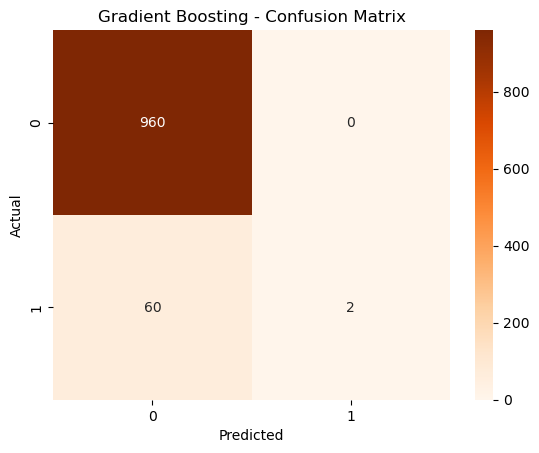

In [29]:
cm = confusion_matrix(y_test, gb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Neural Network

In [31]:
nn_model = models["Neural Network"]
nn_preds = nn_model.predict(X_test)

print("Neural Network")
print("Accuracy :", accuracy_score(y_test, nn_preds))
print("Precision:", precision_score(y_test, nn_preds))
print("Recall   :", recall_score(y_test, nn_preds))
print("F1 Score :", f1_score(y_test, nn_preds))
print("ROC AUC  :", roc_auc_score(y_test, nn_preds))

Neural Network
Accuracy : 0.9295499021526419
Precision: 0.08333333333333333
Recall   : 0.016129032258064516
F1 Score : 0.02702702702702703
ROC AUC  : 0.5023353494623656


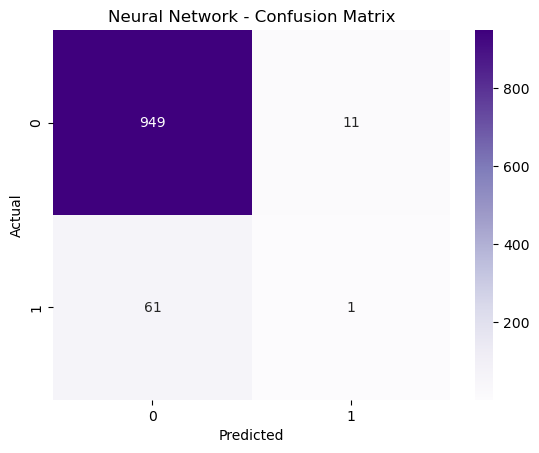

In [32]:
cm = confusion_matrix(y_test, nn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
results = [
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, lr_preds),
        "Precision": precision_score(y_test, lr_preds),
        "Recall": recall_score(y_test, lr_preds),
        "F1 Score": f1_score(y_test, lr_preds),
        "ROC AUC": roc_auc_score(y_test, lr_preds)
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, rf_preds),
        "Precision": precision_score(y_test, rf_preds),
        "Recall": recall_score(y_test, rf_preds),
        "F1 Score": f1_score(y_test, rf_preds),
        "ROC AUC": roc_auc_score(y_test, rf_preds)
    },
    {
        "Model": "Gradient Boosting",
        "Accuracy": accuracy_score(y_test, gb_preds),
        "Precision": precision_score(y_test, gb_preds),
        "Recall": recall_score(y_test, gb_preds),
        "F1 Score": f1_score(y_test, gb_preds),
        "ROC AUC": roc_auc_score(y_test, gb_preds)
    },
    {
        "Model": "Neural Network",
        "Accuracy": accuracy_score(y_test, nn_preds),
        "Precision": precision_score(y_test, nn_preds),
        "Recall": recall_score(y_test, nn_preds),
        "F1 Score": f1_score(y_test, nn_preds),
        "ROC AUC": roc_auc_score(y_test, nn_preds)
    }
]

In [34]:
final_result = pd.DataFrame(results)
final_result.set_index("Model", inplace=True)
print(final_result)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                                 
Logistic Regression  0.939335   0.000000  0.000000  0.000000  0.500000
Random Forest        0.939335   0.000000  0.000000  0.000000  0.500000
Gradient Boosting    0.941292   1.000000  0.032258  0.062500  0.516129
Neural Network       0.929550   0.083333  0.016129  0.027027  0.502335


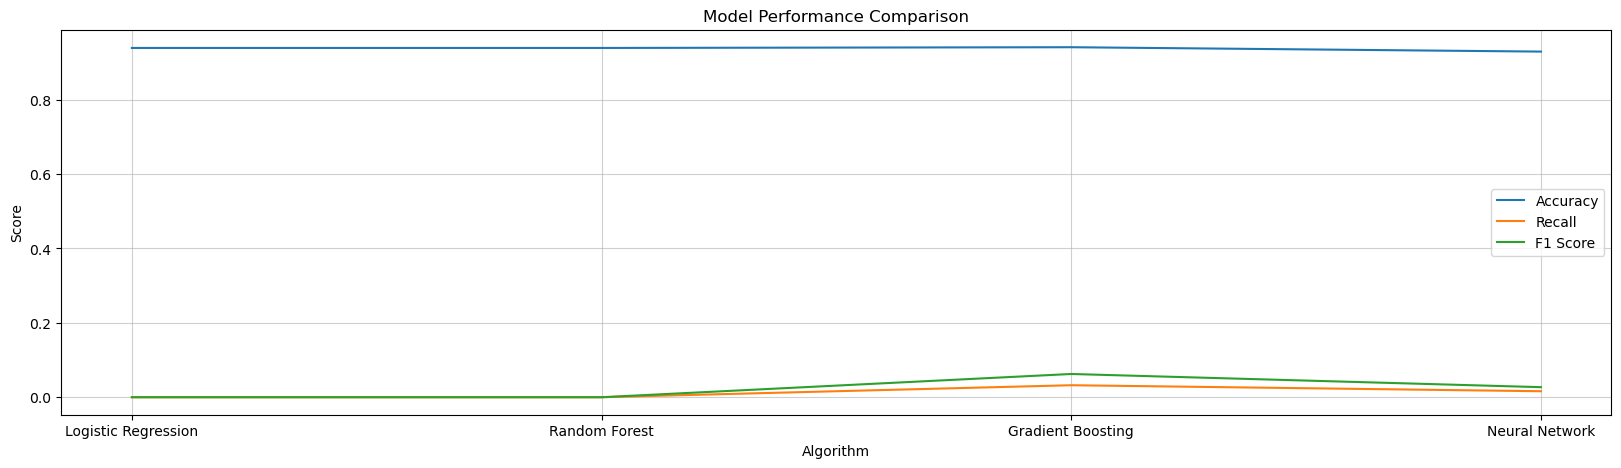

In [35]:
models = final_result.index
accuracy = final_result['Accuracy']
recall = final_result['Recall']
f1_score = final_result['F1 Score']

fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(models, accuracy, label='Accuracy')
plt.plot(models, recall, label='Recall')
plt.plot(models, f1_score, label='F1 Score')

plt.title('Model Performance Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.6)

plt.show()

### 4. Model Optimization:

In [ ]:
rf = RandomForestClassifier(random_state=42)

random_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30]
}

rf_random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=random_grid,
                                      n_iter=30,
                                      cv=5,
                                      random_state=42,
                                      scoring='f1')

rf_random_search.fit(X_train, y_train)

print("Best parameters from Random Search:")
print(rf_random_search.best_params_)


In [93]:
param_grid = {
    'n_estimators': [rf_random_search.best_params_['n_estimators']],
    'max_depth': [rf_random_search.best_params_['max_depth'] - 5,
                  rf_random_search.best_params_['max_depth']]
}

rf_grid_search = GridSearchCV(estimator=rf,
                              param_grid=param_grid,
                              cv=5,
                              scoring='f1')

rf_grid_search.fit(X_train, y_train)
best_model = rf_grid_search.best_estimator_

print("Best parameters from Grid Search:")
print(rf_grid_search.best_params_)

y_pred = rf_grid_search.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters from Grid Search:
{'bootstrap': False, 'max_depth': 15, 'n_estimators': 300}
Confusion Matrix:
 [[958   2]
 [ 61   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

